# Visualizing small random graphs in R^2

We construct these graphs by sampling $n$ points from a standard normal distribution, and connecting each point to its k-nearest-neighbors. The knn relation is not symmetric, so k is a lower bound on the degree of each node but not an upper bound.

In [32]:

import matplotlib.pyplot as plt
import gym
import gym_graph_search

#data = [(0,1),(2,3),(4,5),(6,7)]
#plt.plot(*data)

#ax1, ax2, ax3, ax4 = axes.ravel()

def vis_random(ax,n=10,k=2):
    g = gym.make("graph-search-rd-v0", n=n, k=k, d=2, output=False)
    edges = g.graph_edges
    locs = g.state_vectors

    # https://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors
    data = []
    for k, neighbors in enumerate(edges):
        #print(k, neighbors)
        x0,y0 = locs[k]
        for j in neighbors:
            x1,y1 = locs[j]
            data += [(x0,x1), (y0,y1)]
    ax.plot(*data)
    
    lx = [l[0] for l in locs]
    ly = [l[1] for l in locs]
    ax.plot(lx, ly, 'o')


def vis_randoms(ks, ns):
    for n in ns:
        for k in ks:
            fig, axes = plt.subplots(ncols=5, nrows=1, sharey=True, figsize=(16,6))
            plt.title("Random graphs in \R^2 for n={},k={}".format(n,k), loc="center")
            axs = axes.ravel()
            for ax in axs:
                vis_random(ax=ax,k=k,n=n)
    


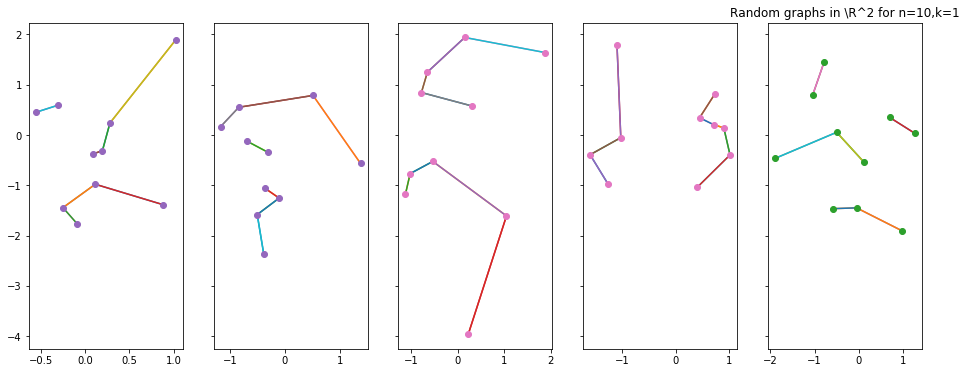

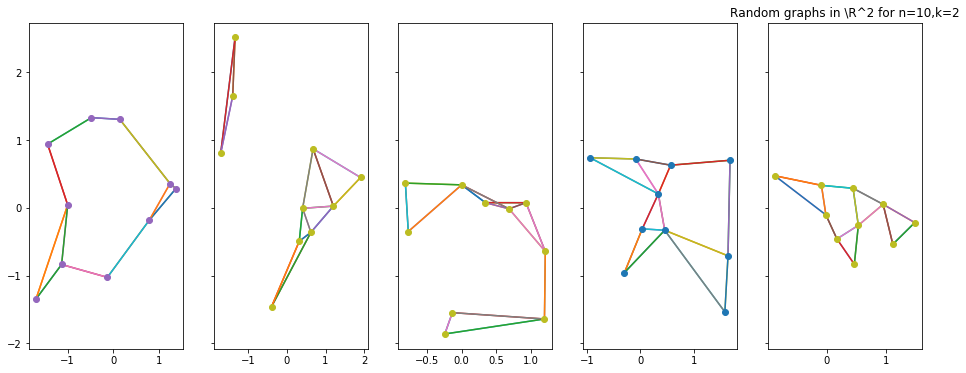

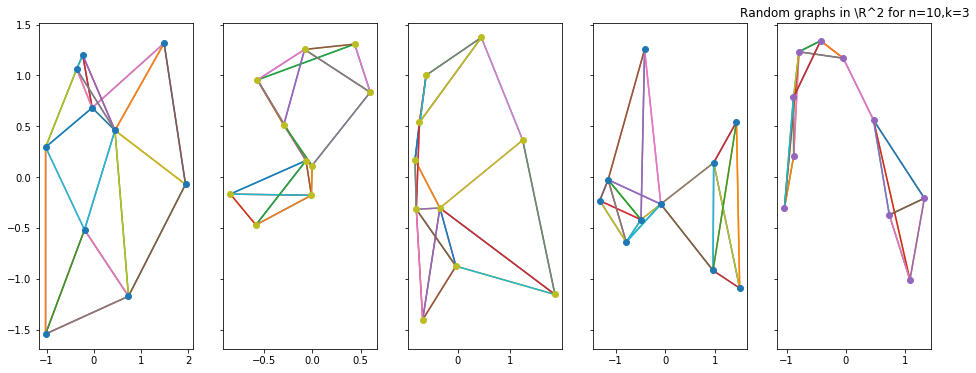

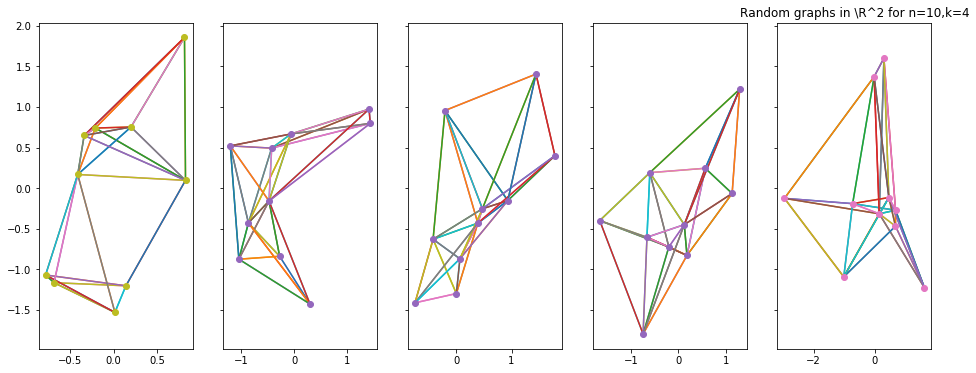

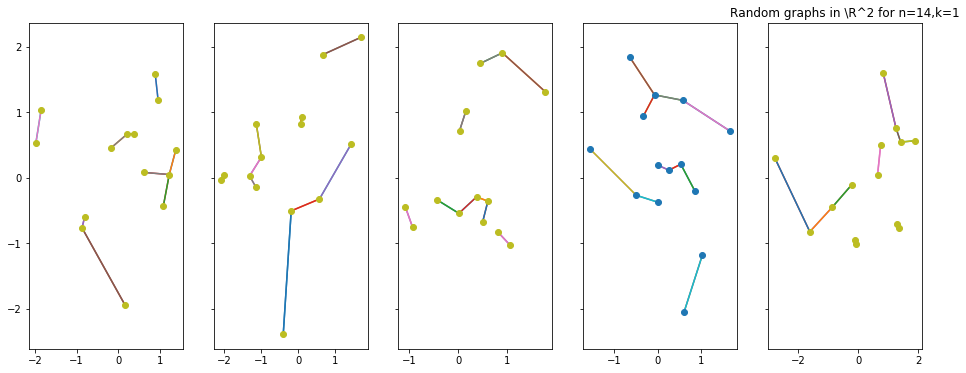

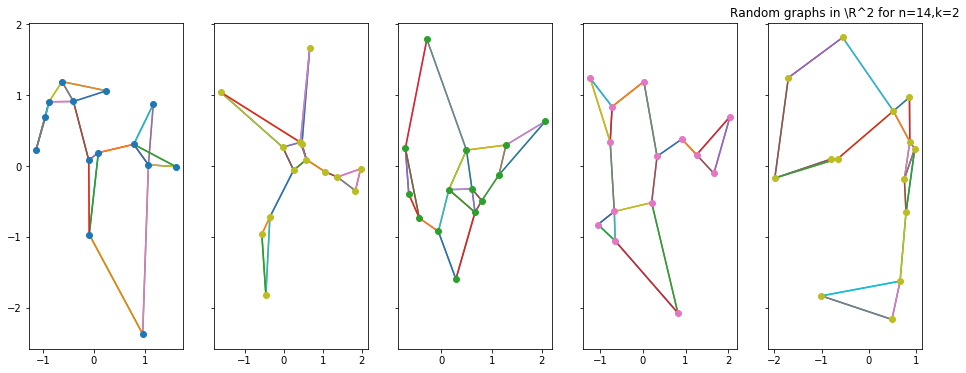

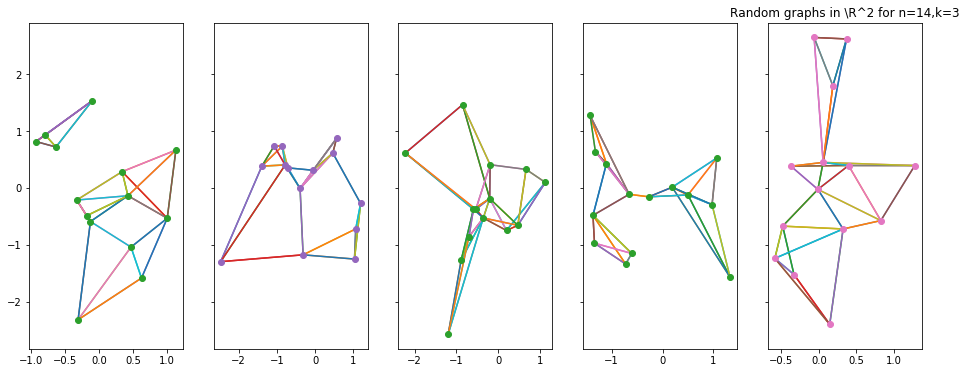

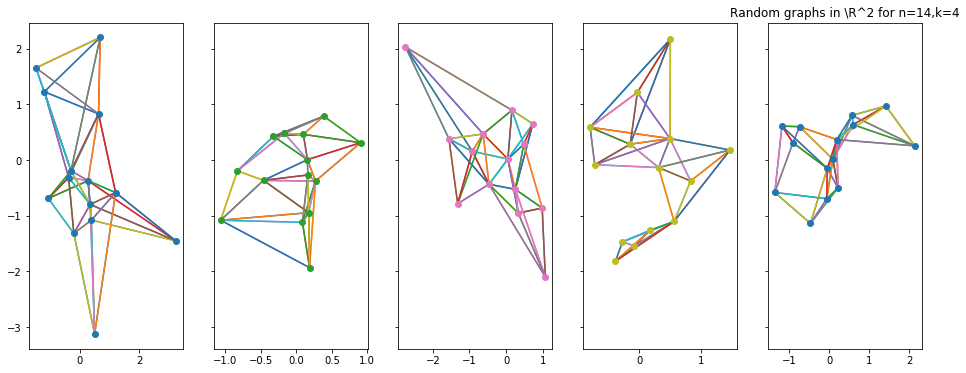

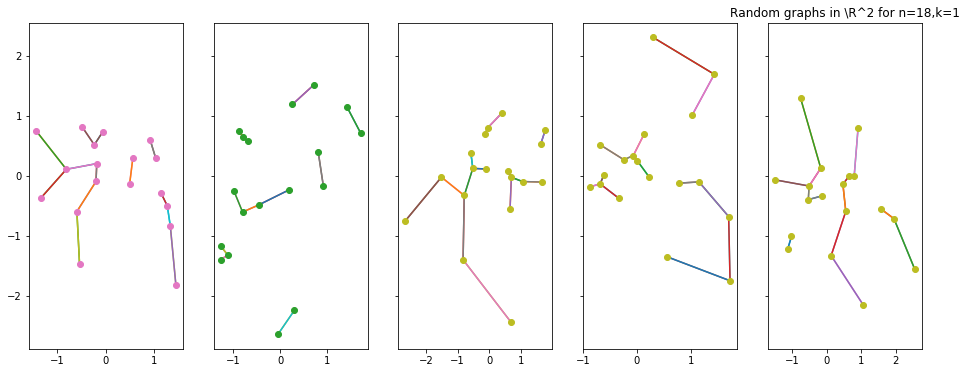

In [ ]:
ks = list(range(1,5))
ns = [10,14,18]
vis_randoms(ks, ns)